In [171]:
# This script get summary statistics for fig1B
# Author: yur97

import sys
sys.path.append('../src')

import pickle
from ceres_infer.analyses import *
from ceres_infer.data import stats_Crispr, scale_data

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [172]:
# Read in data
dm_data = pickle.load(open('../out/20.0817 proc_data/gene_effect/dm_data.pkl','rb'))

In [174]:
def plot_summ(dat, name):
    
    # get summary statistics
    medf=dat.median(axis=1)
    medf.name = 'median'
    medf = medf.to_frame()
    df_summ = dat.apply(pd.DataFrame.describe, axis=1)
    
    #plot
    sns.set_style("dark")
    sns.set(font_scale=1)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
    fig.suptitle('%s Summary'%(name))
    

    sns.boxplot(y=medf['median'], ax = axes[0],color="skyblue")
    sns.swarmplot(y=medf['median'], ax = axes[0],color="grey", alpha = 0.15)
    sns.boxplot(y=df_summ['mean'],ax=axes[1],palette="coolwarm")
    sns.swarmplot(y=df_summ['mean'],ax=axes[1],color="grey", alpha = 0.15)
    sns.boxplot(y = df_summ['std'], ax =axes[2],palette="spring")
    sns.swarmplot(y = df_summ['std'], ax =axes[2],color="grey", alpha = 0.15)

    fig.tight_layout(pad=2.5)

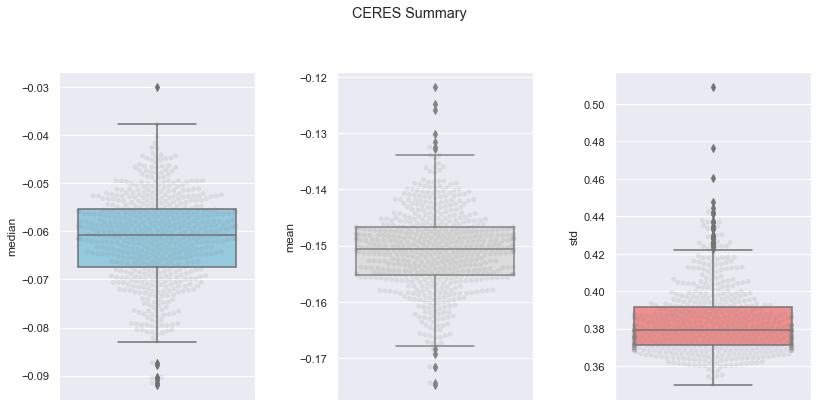

In [175]:
plot_summ(dm_data.df_crispr, 'CERES')

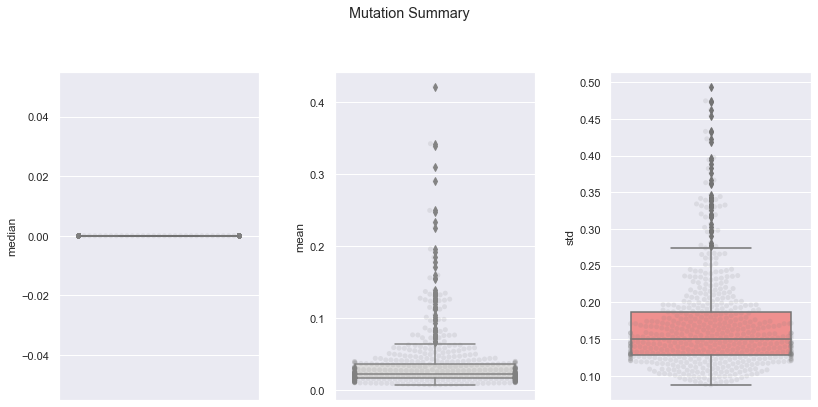

In [176]:
plot_summ(dm_data.df_mut, 'Mutation')

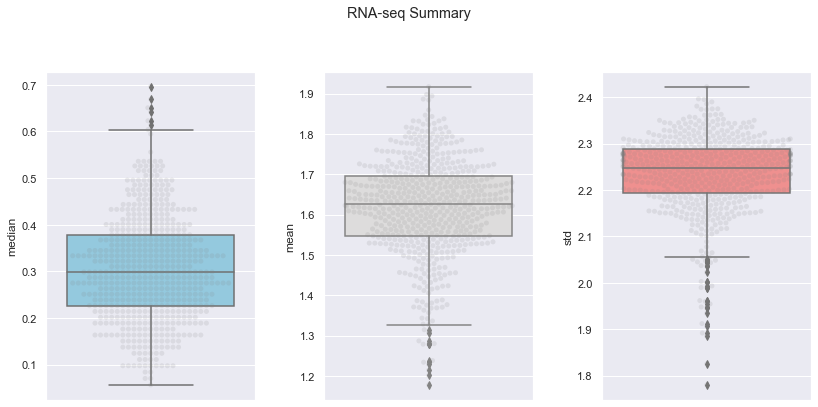

In [177]:
plot_summ(dm_data.df_rnaseq,'RNA-seq')

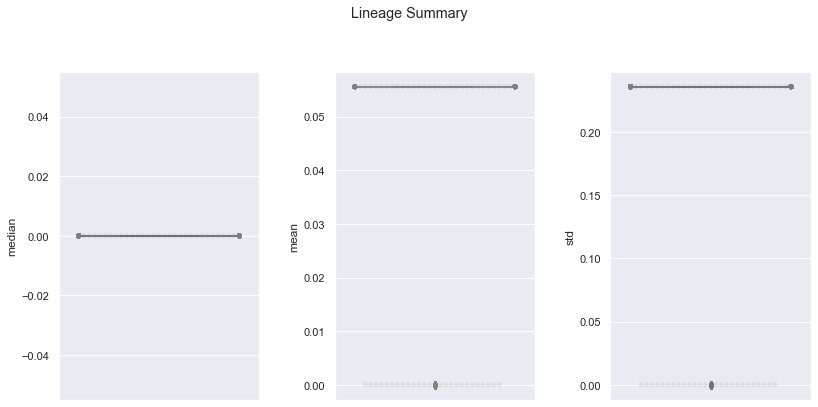

In [178]:
plot_summ(dm_data.df_lineage, 'Lineage')

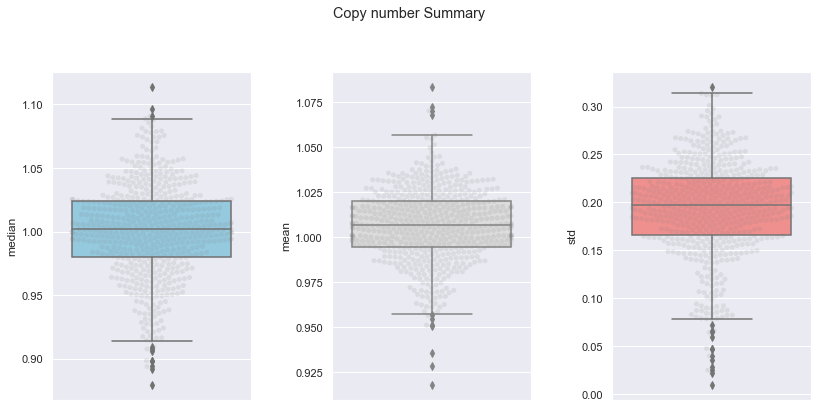

In [179]:
plot_summ(dm_data.df_cn, 'Copy number')